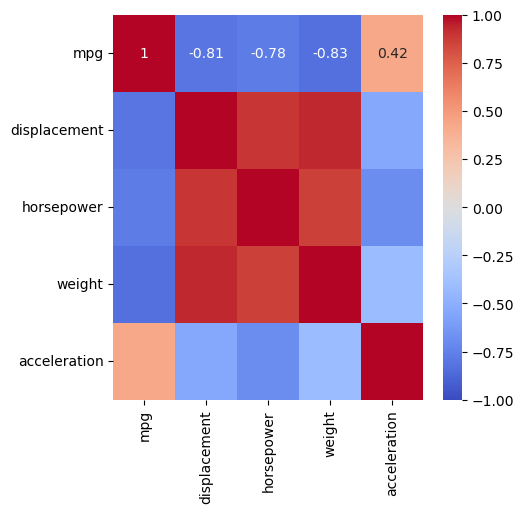

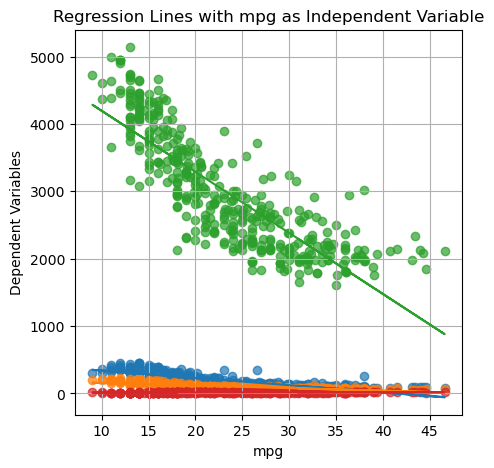

In [ ]:
# Exercise 1
# exercise 1.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('auto-mpg.csv')
# Drop the origin column when computing correlations
data_droppedUSA = data.drop('origin', axis=1)

corr_matrix = data_droppedUSA.corr()
plt.figure(figsize=(5,5))
# Display correlation values on the plot
# Use a diverging color scale with range [-1, 1] centered at 0
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin = -1,
    vmax = 1,
    center = 0
    )
plt.show()

# Compute the regression line
results = {}
for var in ['displacement', 'horsepower', 'weight', 'acceleration']:
    y = data[var]
    x = data['mpg']
    a = y.cov(x) / x.var()  # Slope
    b = y.mean() - a * x.mean()  # Intercept
    results[var] = {'slope': a, 'intercept': b}

# Plot all scatter points and regression lines
plt.figure(figsize=(5,5))

for var, res in results.items():
    a, b = res['slope'], res['intercept']
    x_vals = data['mpg']
    y_vals = a * x_vals + b
    plt.scatter(data['mpg'], data[var], label=f'{var} data', alpha=0.7)
    plt.plot(x_vals, y_vals, label=f'{var} line: {var} = {a:.2f} * mpg + {b:.2f}')

# Add labels, title, and legend
plt.xlabel('mpg')
plt.ylabel('Dependent Variables')
plt.title('Regression Lines with mpg as Independent Variable')
plt.grid(True)
plt.show()

# Since the acceleration is the closest to 0, it would be least suitable for predicting mpg.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

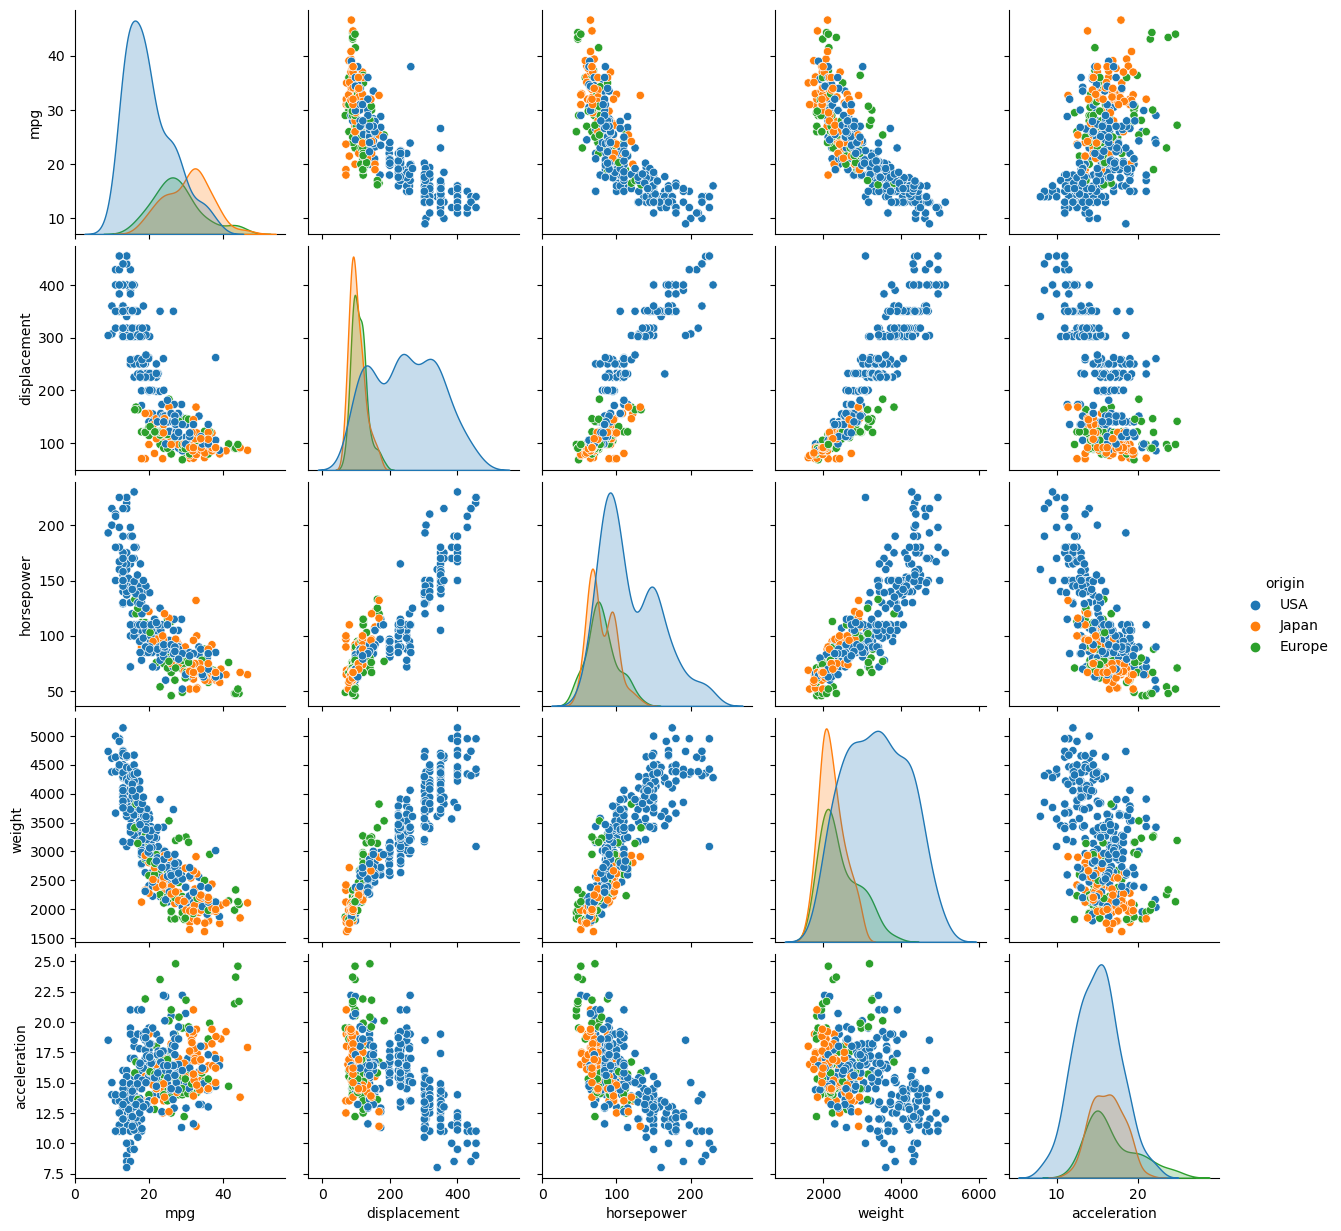

In [ ]:
# Problem 1.2
import pandas as pd
import seaborn as sns

data = pd.read_csv('auto-mpg.csv')

sns.pairplot(data, hue="origin")

# It would be the best to use the polynomial regression to predict mpg using horsepower because
# the curve is making the shape of y = ax^2+bx+c.

In [35]:
# Exercise 2: Linear and Polinomial Regression
# Exercise 2.1: Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


data = pd.read_csv('auto-mpg.csv')

X = data[['horsepower']]
y = data['mpg']

# Split the data into training and testing sets (80%-20% split)
X_train_set, X_train_test, y_train_set, y_train_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Exercise 2.2: Simple Linear Regression
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_set, y_train_set)

# Predict mpg for the testing data
y_pred = model.predict(X_train_test)

# Evaluate the model
MSE = mean_squared_error(y_train_test, y_pred)

print(f"Mean Squared Error: {MSE}")

# Exercise 2.3: Polynomial Regression

Mean Squared Error: 22.153237123863413


In [39]:
# Exercise 2.3: Polynomial Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('auto-mpg.csv')

X = data[['horsepower']]
y = data['mpg']

X_train_set, X_train_test, y_train_set, y_train_test = train_test_split(X, y, test_size=0.2,random_state=42)

degrees = [2, 3, 4]
train_MSE_scores = {}
test_MSE_scores = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_set)
    X_test_poly = poly.fit_transform(X_train_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train_set)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_MSE = mean_squared_error(y_train_set, y_train_pred)
    test_MSE = mean_squared_error(y_train_test, y_test_pred)
    
    train_MSE_scores[degree] = train_MSE
    test_MSE_scores[degree] = test_MSE
    
    print(f"Degree {degree}:")
    print(f"  Training MSE: {train_MSE}")
    print(f"  Testing MSE: {test_MSE}")
    

Degree 2:
  Training MSE: 19.204613691977045
  Testing MSE: 18.416967796017772
Degree 3:
  Training MSE: 19.1437880347016
  Testing MSE: 18.460267222059827
Degree 4:
  Training MSE: 19.126191343999782
  Testing MSE: 18.268226877261142


In [1]:
# 3.1: SSE Calculation

import pandas as pd
import numpy as np

data = pd.read_csv('fitting.csv')

train_actual = data['Training Data']
SSE_train = {
    f'SSE {col}': np.sum((train_actual - data[col]) ** 2)
    for col in ['Prediction 1 Training', 'Prediction 2 Training', 'Prediction 3 Training']
}

test_actual = data['Test Data']
SSE_test = {
    f'SSE {col}': np.sum((test_actual - data[col]) ** 2)
    for col in ['Prediction 1 Test', 'Prediction 2 Test', 'Prediction 3 Test']
}

print("Training SSE:", SSE_train)
print("Testing SSE:", SSE_test)

Training SSE: {'SSE Prediction 1 Training': 12.2935, 'SSE Prediction 2 Training': 12.336300000000003, 'SSE Prediction 3 Training': 19.1735}
Testing SSE: {'SSE Prediction 1 Test': 6.3418, 'SSE Prediction 2 Test': 2.1254, 'SSE Prediction 3 Test': 13.425899999999999}


In [ ]:
# 3.2: Model Classification

import pandas as pd
import numpy as np

data = pd.read_csv('fitting.csv')

results = {}

for pred_idx in range(1,4):
    train_MSE = np.mean((data['Training Data'] - data[f'Prediction {pred_idx} Training']) ** 2)
    test_MSE = np.mean((data['Test Data'] - data[f'Prediction {pred_idx} Test']) ** 2)
    
    results[f'Prediction {pred_idx}'] = {'Training MSE': train_MSE, 'Test MSE': test_MSE}

classifications = {}

for prediction, MSE in results.items():
    train_MSE = MSE['Training MSE']
    test_MSE = MSE['Test MSE']
    # TODO: Adjust the justification
    if abs(test_MSE - train_MSE) < 0.2 * train_MSE:
        classification = 'Base'
    elif test_MSE > 1.5 * train_MSE:
        classification = 'Overfitting'
    else:
        classification = 'Underfitting'

    classifications[prediction] = classification
    
print('MSE Results')
for prediction, MSE in results.items():
    print(f'{prediction}:')
    print(f"  Training MSE: {MSE['Training MSE']}")
    print(f"  Testing MSE: {MSE['Test MSE']}")
    print(f"  Classification: {classifications[prediction]}")

MSE Results
Prediction 1:
  Training MSE: 0.49174
  Testing MSE: 1.26836
  Classification: Overfitting
Prediction 2:
  Training MSE: 0.4934520000000001
  Testing MSE: 0.42508
  Classification: Base
Prediction 3:
  Training MSE: 0.7669400000000001
  Testing MSE: 2.68518
  Classification: Overfitting
